In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [16]:
house = pd.read_csv("data/houses.csv")
house.head()

,house_id,num_rooms,num_bathrooms,square_feet,location,price
0,H0001,3.084706,2.001556,3959,Countryside,652583.461634
1,H0002,1.909229,1.298050,999,Beachside,875964.302077
2,H0003,4.160328,1.246055,3335,Suburbs,593180.703213
3,H0004,3.538614,2.921933,3514,Downtown,349318.850189
4,H0005,1.728998,1.100780,1121,Suburbs,385411.368509


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       1000 non-null   object 
 1   num_rooms      897 non-null    float64
 2   num_bathrooms  887 non-null    float64
 3   square_feet    1000 non-null   int64  
 4   location       1000 non-null   object 
 5   price          1000 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 47.0+ KB


In [7]:
house.isna().sum() # same as house.isnull().sum()

house_id           0
num_rooms        103
num_bathrooms    113
square_feet        0
location           0
price              0
dtype: int64

In [10]:
house.describe()

,num_rooms,num_bathrooms,square_feet,price
count,897.000000,887.000000,1000.00000,1000.000000
mean,3.034720,1.983479,2317.27600,554116.946351
std,1.139738,0.585720,992.63602,262584.052378
min,1.000665,1.003236,601.00000,100269.685468
25%,2.082586,1.473066,1454.25000,323256.849095
50%,3.075513,1.980349,2323.50000,543808.902227
75%,4.017156,2.484013,3161.50000,785601.623460
max,4.994562,2.999960,3997.00000,999315.454376


In [17]:
# Recommended approach
house[["num_rooms", "num_bathrooms"]] = house[["num_rooms", "num_bathrooms"]].fillna(house[["num_rooms", "num_bathrooms"]].mean())

In [18]:
house.describe()

,num_rooms,num_bathrooms,square_feet,price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,3.034720,1.983479,2317.27600,554116.946351
std,1.079385,0.551600,992.63602,262584.052378
min,1.000665,1.003236,601.00000,100269.685468
25%,2.168580,1.523635,1454.25000,323256.849095
50%,3.034720,1.983479,2323.50000,543808.902227
75%,3.877198,2.416842,3161.50000,785601.623460
max,4.994562,2.999960,3997.00000,999315.454376


In [19]:
# Encode categorical features
house = pd.get_dummies(house, columns=["location"])
house.head()

,house_id,num_rooms,num_bathrooms,square_feet,price,location_Beachside,location_Countryside,location_Downtown,location_Suburbs
0,H0001,3.084706,2.001556,3959,652583.461634,False,True,False,False
1,H0002,1.909229,1.298050,999,875964.302077,True,False,False,False
2,H0003,4.160328,1.246055,3335,593180.703213,False,False,False,True
3,H0004,3.538614,2.921933,3514,349318.850189,False,False,True,False
4,H0005,1.728998,1.100780,1121,385411.368509,False,False,False,True


In [23]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X = house.drop(["price", "house_id"], axis=1)
y = house["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Build a simple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predictions
y_pred = model.predict(X_test)

# Model Evaluation Metrics
from sklearn.metrics import (
    mean_squared_error,  # Average squared difference between predicted and actual
    mean_absolute_error,  # Average absolute difference
    r2_score  # Proportion of variance explained
)

In [33]:
def mean_absolute_percentage_error(y_test, y_pred):
    # Avoid division by zero
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    
    # Calculate MAPE, handling zero values
    mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1e-8))) * 100
    return mape

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R-squared Score:", r2)

Mean Squared Error: 65466625727.10727
Root Mean Squared Error: 255864.46749618687
Mean Absolute Error: 219183.9740834146
Mean Absolute Percentage Error: 66.16023396013739
R-squared Score: -0.0047346337716409614


In [34]:
# Model Coefficients and Intercept
print("\nCoefficients:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")

print("\nIntercept:", model.intercept_)


Coefficients:
num_rooms: 293.0243839149157
num_bathrooms: 7799.295314448507
square_feet: -9.032415905554629
location_Beachside: -11276.502401619695
location_Countryside: 5757.394671361369
location_Downtown: 8201.302270300594
location_Suburbs: -2682.19454004226

Intercept: 560273.358402175


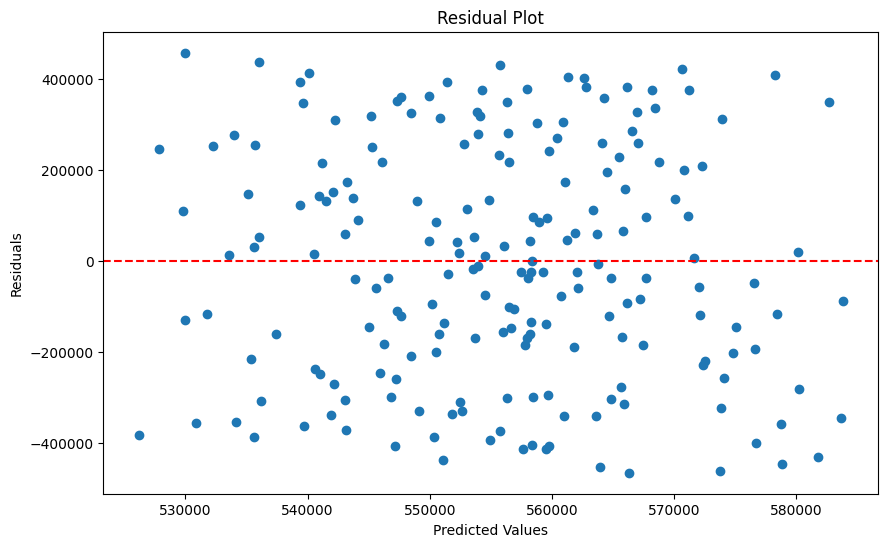

In [35]:
# Residual Analysis
residuals = y_test - y_pred

# Visualize Residuals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [36]:
# Build a random forest regression model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R-squared Score:", r2)

Mean Squared Error: 72291901854.61818
Root Mean Squared Error: 268871.5341099131
Mean Absolute Error: 225299.4290676563
Mean Absolute Percentage Error: 67.07824084823433
R-squared Score: -0.1094840573779583


In [39]:
# Model Feature Importance
print("\nCoefficients:")
for feature, coef in zip(X_train.columns, rf_model.feature_importances_):
    print(f"{feature}: {coef}")


Coefficients:
num_rooms: 0.3106742499594356
num_bathrooms: 0.268921663678724
square_feet: 0.3194276952544332
location_Beachside: 0.02650689729444871
location_Countryside: 0.02499926963390453
location_Downtown: 0.023238923174532633
location_Suburbs: 0.026231301004521156


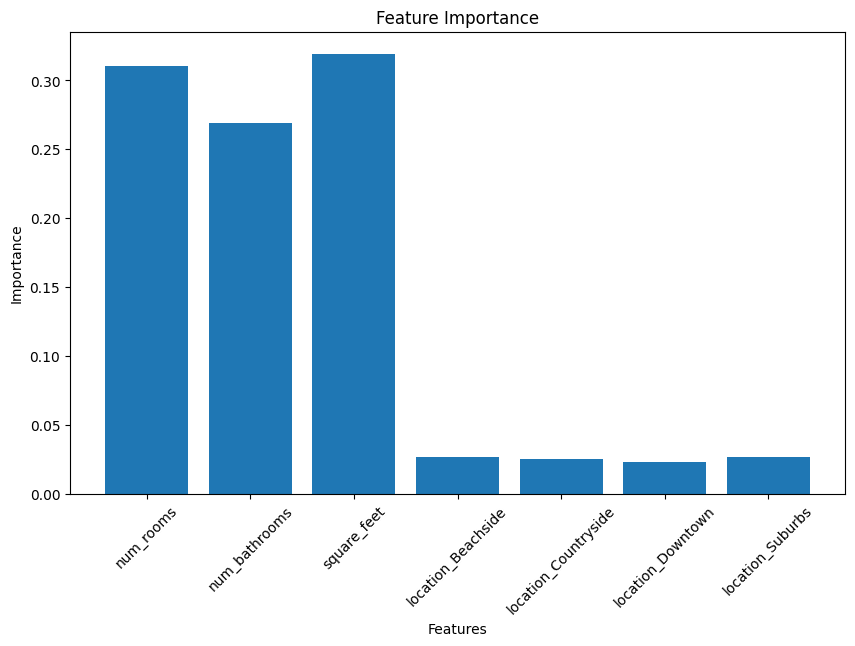

In [40]:
# Visalize Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()